# Energy dispersion

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import gaussian_kde
import seaborn as sns
from scipy import stats

In [5]:
def plot_binned_mean(x, y, ax=None, errorbar=False, bins=20, **kwargs):
    """
    Plot binned statistics
    """
    
    from scipy import stats
    
    ax = plt.gca() if ax is None else ax
    
    bin_means, bin_edges, binnumber = stats.binned_statistic(x, y, statistic='mean', bins=bins)
    bin_width = (bin_edges[1] - bin_edges[0])
    bin_centers = bin_edges[1:] - bin_width/2
    
    bin_with_data = np.unique(binnumber) - 1
    bin_r68 = np.array([np.percentile(np.abs(y[binnumber==i]-bin_means[i-1]), 68) \
                        for i in set(binnumber)])

    ax.hlines(bin_means, bin_edges[:-1], bin_edges[1:], **kwargs)
    if 'label' in kwargs: kwargs.pop('label')
    ax.vlines(bin_centers[bin_with_data], 
              bin_means[bin_with_data] - bin_r68, 
              bin_means[bin_with_data] + bin_r68,
              **kwargs
             )
    
    return ax

For this study, you need a reduced DL1 file

In [2]:
infile = '../../Data/DL1-param/ctapipe/LaPalma/ctapipe_gamma_point_source.h5'

df = pd.read_hdf(infile)

In [3]:
# In this file intensity and mc_energy are in log
x = df.mc_core_distance
y = (df.intensity-df.mc_energy)
df['ie'] = df.intensity - df.mc_energy

No handles with labels found to put in legend.


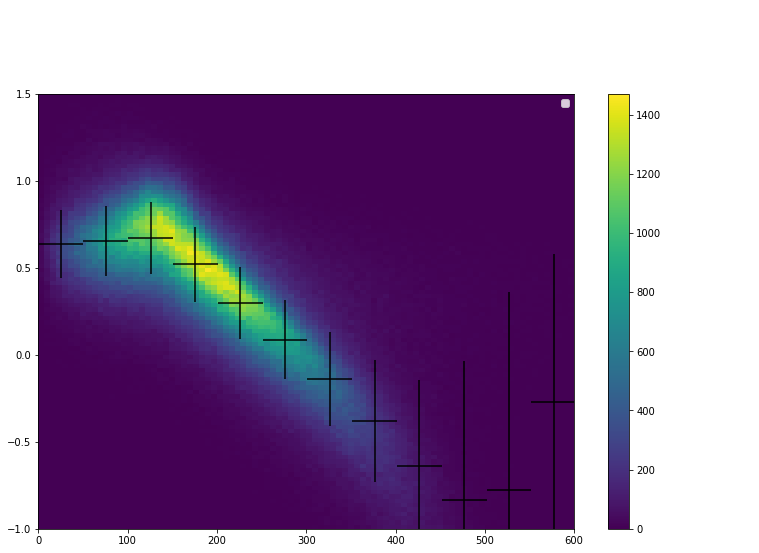

In [8]:
fig = plt.figure(figsize=(12,8))
plt.hist2d(x, y, bins=120, range=((0,800), (-1, 2)));
plt.colorbar();

plot_binned_mean(x, y, bins=30)
plt.legend(fontsize=10)
plt.ylim(-1, 1.5)
plt.xlim(0, 600)
plt.show()